In [115]:
# import sys
# print(sys.executable)
# print(sys.version)

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

In [159]:
def plot_c1contour(file, wrf_var, wrf_run):

    wrf_single = Dataset(file, 'r')

    var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)

    # 1st time step
    var_1time = var[0, :, :]
    
    if 'bottom_top' in var_1time.dims: 
        var_1time = var_1time[0, :, :]
    
#     print(var.shape)
#     print(var_1time)

    lats, lons = wrf.latlon_coords(var)

    bm = wrf.get_basemap(var_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(var.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

    plt.show()

In [122]:
wrf_runs_dir = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/'
nb_dir = !pwd
data_dir_df = pd.read_csv(nb_dir[0]+'/data-dir-j3leswrf.csv', index_col=0)

In [129]:
nb_dir

['/lustre/eaglefs/projects/mmcpnnl/jlee/mmc-pnnl-j3/sgp/eagle']

In [126]:
eval_date = '2018-08-05'

date_col = data_dir_df[eval_date]

In [127]:
data_dir_df

,2018-08-05,2018-09-01
mynn,l1_0805m,l3_0901m
edmf,l2_0805e,l4_0901e
mynn_1arcs,l5_0805m,NaN
wrf_start,8/4/18 12:00,8/31/18 12:00


In [128]:
date_col

mynn              l1_0805m
edmf              l2_0805e
mynn_1arcs        l5_0805m
wrf_start     8/4/18 12:00
Name: 2018-08-05, dtype: object

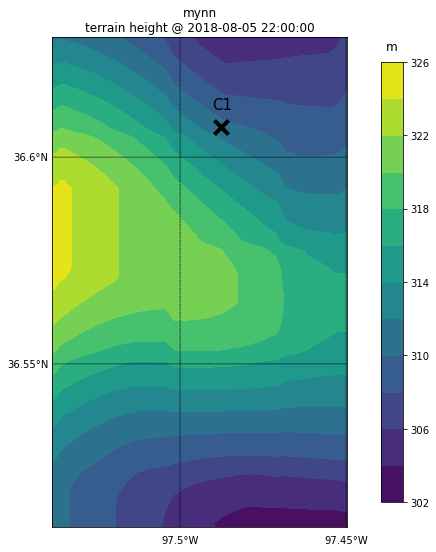

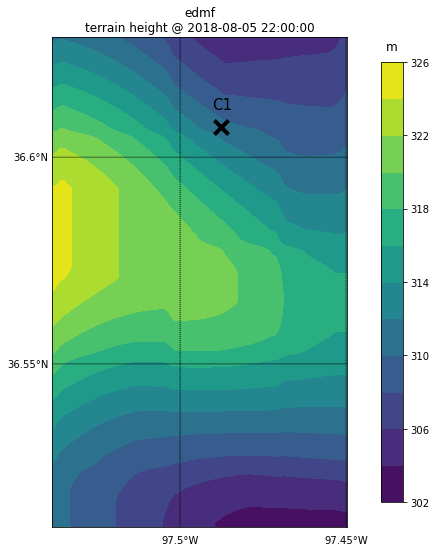

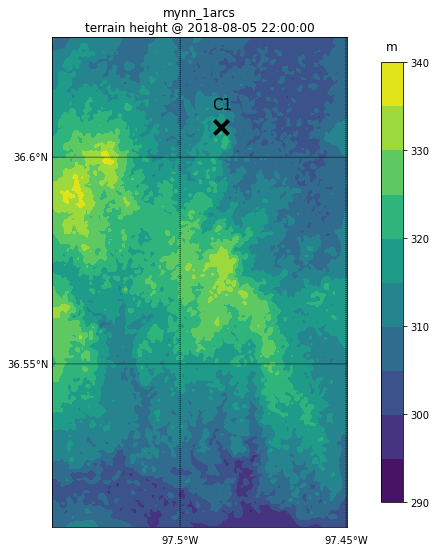

In [165]:
eval_date = '2018-08-05'
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'ter', row)

(330, 200)


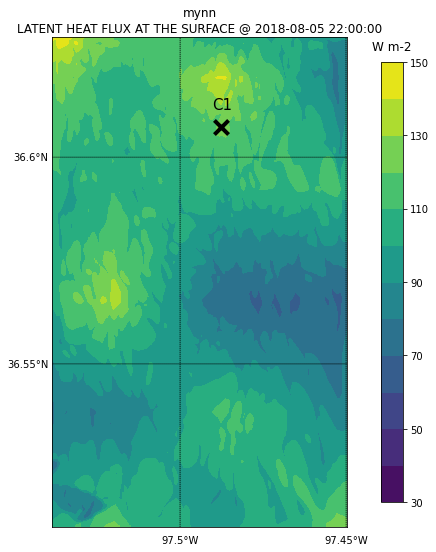

(330, 200)


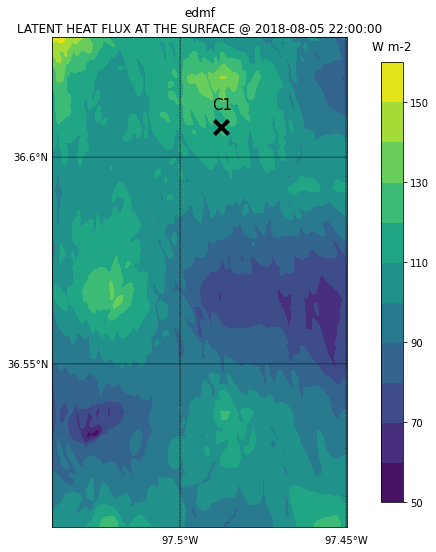

(330, 200)


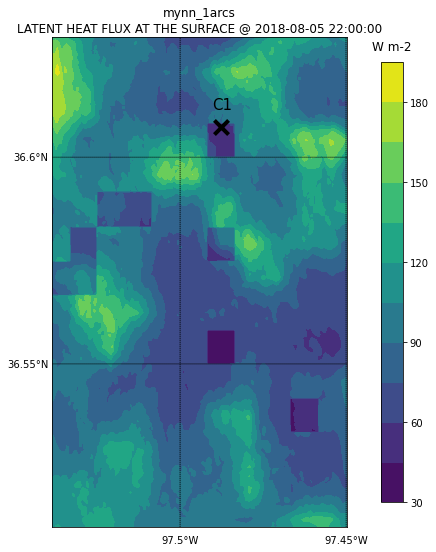

In [142]:
eval_date = '2018-08-05'
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)
#     print(file)

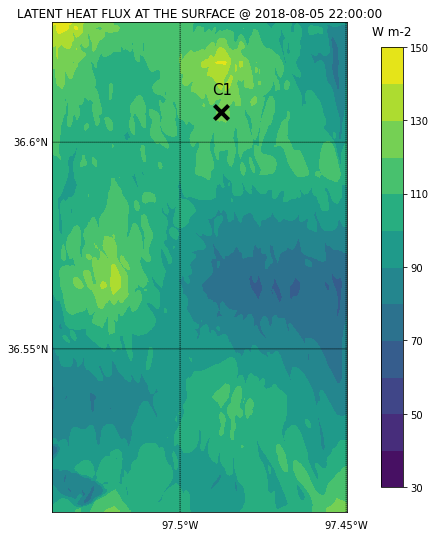

In [121]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'

plot_c1contour(file, 'LH', )

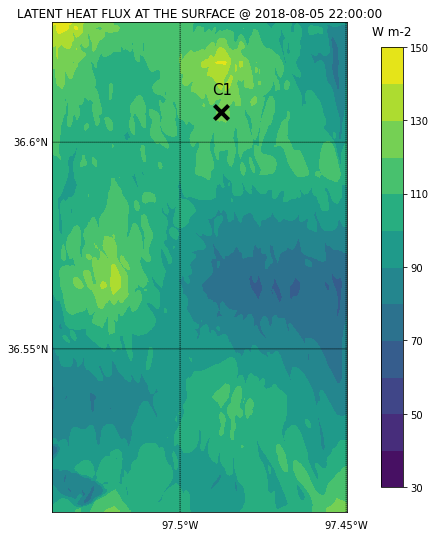

In [118]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'

def plot_contour(file, var, ):

    wrf_single = Dataset(file, 'r')

    lh = wrf.getvar(wrf_single, 'LH', timeidx=wrf.ALL_TIMES)

    # 1st time step
    lh_1time = lh[0,:,:]

    lats, lons = wrf.latlon_coords(lh)

    bm = wrf.get_basemap(lh_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(lh), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(lh_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(lh.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(lh_1time.description+' @ '+str(pd.Timestamp(lh_1time['Time'].values)))

    plt.show()

In [114]:

str(pd.Timestamp(lh_1time['Time'].values))

'2018-08-05 22:00:00'

In [111]:
lh_1time['Time'].values

numpy.datetime64('2018-08-05T22:00:00.000000000')

In [107]:
lh[0,:,:]

<xarray.DataArray 'LH' (south_north: 330, west_east: 200)>
array([[100.08931 , 100.60693 , 101.41757 , ..., 122.073944, 121.502975,
        120.871185],
       [100.02601 , 100.14871 , 100.95103 , ..., 122.32097 , 121.70131 ,
        121.28672 ],
       [ 99.87836 , 100.218994, 100.95767 , ..., 122.547874, 122.04918 ,
        121.67897 ],
       ...,
       [142.21944 , 140.09225 , 138.95943 , ...,  89.44566 ,  89.6289  ,
         90.242355],
       [143.27109 , 141.09857 , 140.15443 , ...,  90.161476,  90.218185,
         90.76178 ],
       [144.3161  , 142.45421 , 141.48114 , ...,  91.04467 ,  91.1091  ,
         91.34456 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    float32 2.04e+03
    Time     datetime64[ns] 2018-08-05T22:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATENT HEAT FLUX AT THE SURFACE
    units:        W m-2
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [137]:
wrf_single

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE: 2018-08-05_15:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    US

In [163]:
import wrf.terrain

ModuleNotFoundError: No module named 'wrf.terrain'

In [164]:
h = wrf.getvar(wrf_single, 'ter', timeidx=wrf.ALL_TIMES)
h[0,:,:]

<xarray.DataArray 'terrain' (south_north: 330, west_east: 200)>
array([[310.85333, 310.78946, 310.72318, ..., 303.21594, 303.22998,
        303.24384],
       [310.8255 , 310.7617 , 310.6955 , ..., 303.2859 , 303.30023,
        303.31445],
       [310.80545, 310.7417 , 310.67554, ..., 303.3573 , 303.37195,
        303.3865 ],
       ...,
       [311.8888 , 311.8746 , 311.8746 , ..., 306.2672 , 306.35834,
        306.44983],
       [311.76663, 311.75226, 311.75226, ..., 306.22614, 306.31686,
        306.40793],
       [311.64514, 311.6306 , 311.6306 , ..., 306.1855 , 306.27576,
        306.3664 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    float32 2.04e+03
    Time     datetime64[ns] 2018-08-05T22:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  terrain height
    units:        m
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [158]:
'bottom_top' in h.dims

False

In [15]:
lh = wrf.getvar(wrf_single, 'LH')

In [6]:
tk = wrf.getvar(wrf_single, 'tk', timeidx=wrf.ALL_TIMES)

In [7]:
lats, lons = wrf.latlon_coords(lh)

In [101]:
lh

<xarray.DataArray 'LH' (south_north: 330, west_east: 200)>
array([[100.08931 , 100.60693 , 101.41757 , ..., 122.073944, 121.502975,
        120.871185],
       [100.02601 , 100.14871 , 100.95103 , ..., 122.32097 , 121.70131 ,
        121.28672 ],
       [ 99.87836 , 100.218994, 100.95767 , ..., 122.547874, 122.04918 ,
        121.67897 ],
       ...,
       [142.21944 , 140.09225 , 138.95943 , ...,  89.44566 ,  89.6289  ,
         90.242355],
       [143.27109 , 141.09857 , 140.15443 , ...,  90.161476,  90.218185,
         90.76178 ],
       [144.3161  , 142.45421 , 141.48114 , ...,  91.04467 ,  91.1091  ,
         91.34456 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    XTIME    float32 2.04e+03
    Time     datetime64[ns] 2018-08-05T22:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATENT HEAT FLUX AT THE SURFACE
    units:        W m-2
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [68]:
lh.description

'LATENT HEAT FLUX AT THE SURFACE'

In [16]:
bm = wrf.get_basemap(lh)

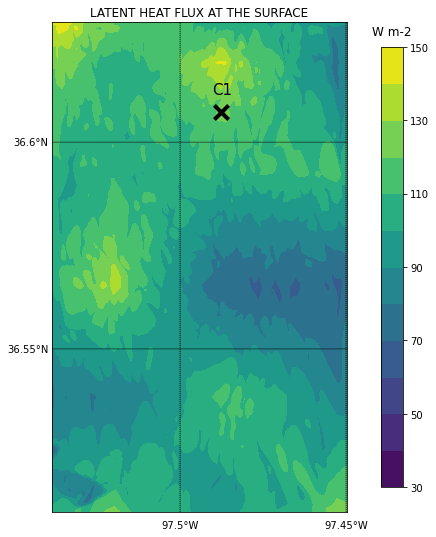

In [100]:
bm = wrf.get_basemap(lh)

# Create a figure
fig = plt.figure(figsize=(12, 9))

# Add geographic outlines
# bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

# Draw the contours and filled contours
# bm.contour(x, y, wrf.to_np(lh), 10, colors="black")
bm.contourf(x, y, wrf.to_np(lh), 10, cmap=get_cmap('viridis'))

# Add a color bar
clb = plt.colorbar(shrink=0.9)
clb.ax.set_title(lh.units, pad=12)

c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
# bm.plot(c1x, c1y, 'kx', markersize=10, linewidth=100.)
bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
# bm.plot(c1x, c1y, 'kx', markersize=10, linewidth=100.)
plt.annotate('C1', xy=(c1x, c1y), size=15)

plt.title(lh.description)

plt.show()